In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CCTV = pd.read_excel('seoul_cctv.xlsx')

In [3]:
CCTV.fillna(0, inplace=True)

In [4]:
CCTV.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [5]:
CCTV.rename(columns={CCTV.columns[0]: '구청별'}, inplace=True)
CCTV.head(2)

,구청별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [6]:
CCTV['2016년 이전'] = CCTV['2011년 이전'] + CCTV['2012년'] + CCTV['2013년'] +\
CCTV['2014년'] +CCTV['2015년'] + CCTV['2016년']
CCTV = CCTV.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년'], axis=1)
CCTV.head(2)

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
1,강 동 구,1879,273,385,1221.0


In [7]:
CCTV.sort_values(by='소계', ascending=True).head(3)

,구청별,소계,2017년,2018년,2016년 이전
9,도 봉 구,858,117,71,670.0
24,중 랑 구,1068,66,9,993.0
2,강 북 구,1265,1,319,945.0


In [8]:
CCTV.sort_values(by='소계', ascending=False).head(3)

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
4,관 악 구,3985,694,671,2620.0
6,구 로 구,3227,540,486,2201.0


In [9]:
POPU = pd.read_excel('seoul_popu.xls')
POPU.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.4/4,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018.4/4,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018.4/4,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [10]:
POPU = pd.read_excel('seoul_popu.xls', header=2, usecols='B, D, G, J, N')
POPU.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [11]:
#POPU = POPU.iloc[2:, [1, 3, 6, 9, 13]]
#POPU.head()

In [12]:
#POPU.columns = pd.Index(['구청별', '총인구', '한국인', '외국인', '고령자'])
#POPU.head(2)

In [13]:
POPU = POPU.rename(columns={POPU.columns[0]: '구청별', POPU.columns[1]: '총인구',
POPU.columns[2]: '한국인', POPU.columns[3]: '외국인',
POPU.columns[4]: '고령자'})
POPU.head(2)

,구청별,총인구,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742


In [14]:
POPU.drop(0, inplace=True)
POPU.head(3)

,구청별,총인구,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640


In [15]:
POPU.index = pd.Index(np.arange(0, 25, 1))
POPU.head(3)

,구청별,총인구,한국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640


In [16]:
POPU.sort_values(by='외국인', ascending=False).head(3)

,구청별,총인구,한국인,외국인,고령자
18,영등포구,403600,367778,35822,55673
16,구로구,438486,404497,33989,61801
17,금천구,254021,233917,20104,35739


In [17]:
POPU.sort_values(by='고령자', ascending=False).head(3)

,구청별,총인구,한국인,외국인,고령자
23,송파구,673507,666635,6872,81364
15,강서구,603611,596949,6662,79660
11,은평구,487666,483197,4469,77420


In [18]:
pd.merge(POPU, CCTV, on='구청별')

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
1,서대문구,323080,310313,12767,50456,2121,415,194,1512.0
2,영등포구,403600,367778,35822,55673,2495,371,793,1331.0


In [19]:
for df in (POPU, CCTV):
    df['구청별'] = df['구청별'].str.replace('\s+', '')

In [20]:
merged = pd.merge(POPU, CCTV, on='구청별')
merged

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,종로구,163026,153065,9961,26742,1471,281,101,1089.0
1,중구,135633,125725,9908,22005,1544,317,328,899.0
2,용산구,245090,228999,16091,37640,2063,60,73,1930.0
3,성동구,316463,308221,8242,42767,2679,933,294,1452.0
4,광진구,371063,355559,15504,45619,1581,468,346,767.0
5,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
6,중랑구,408147,403209,4938,61830,1068,66,9,993.0
7,성북구,447687,435868,11819,67782,3003,285,643,2075.0
8,강북구,322915,319164,3751,58196,1265,1,319,945.0
9,도봉구,341649,339413,2236,55964,858,117,71,670.0


In [21]:
merged.set_index('구청별', inplace=True)
merged

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
구청별,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0
중구,135633,125725,9908,22005,1544,317,328,899.0
용산구,245090,228999,16091,37640,2063,60,73,1930.0
성동구,316463,308221,8242,42767,2679,933,294,1452.0
광진구,371063,355559,15504,45619,1581,468,346,767.0
동대문구,364338,348052,16286,57165,2003,136,197,1670.0
중랑구,408147,403209,4938,61830,1068,66,9,993.0
성북구,447687,435868,11819,67782,3003,285,643,2075.0
강북구,322915,319164,3751,58196,1265,1,319,945.0


In [22]:
merged['1인당CCTV비율'] = merged['소계']/merged['총인구'] * 100
merged

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당CCTV비율
구청별,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0,0.902310
중구,135633,125725,9908,22005,1544,317,328,899.0,1.138366
용산구,245090,228999,16091,37640,2063,60,73,1930.0,0.841732
성동구,316463,308221,8242,42767,2679,933,294,1452.0,0.846544
광진구,371063,355559,15504,45619,1581,468,346,767.0,0.426073
동대문구,364338,348052,16286,57165,2003,136,197,1670.0,0.549764
중랑구,408147,403209,4938,61830,1068,66,9,993.0,0.261670
성북구,447687,435868,11819,67782,3003,285,643,2075.0,0.670781
강북구,322915,319164,3751,58196,1265,1,319,945.0,0.391744


In [23]:
merged['총인구'].corr(merged['소계'], method='spearman')

0.42000000000000004

In [24]:
merged['외국인'].corr(merged['소계'])

0.18119377441191767

In [25]:
from matplotlib import rcParams
params = {'legend.fontsize' : 14}
plt.rcParams.update(params)
plt.rcParams['axes.grid'] = True
plt.rc('grid', linestyle='--')
plt.grid(True)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.close('all')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

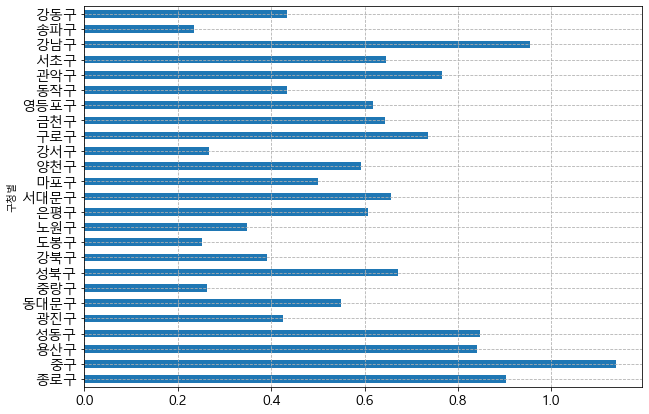

In [26]:
merged['1인당CCTV비율'].plot(kind='barh', figsize=(10, 7))
plt.show()

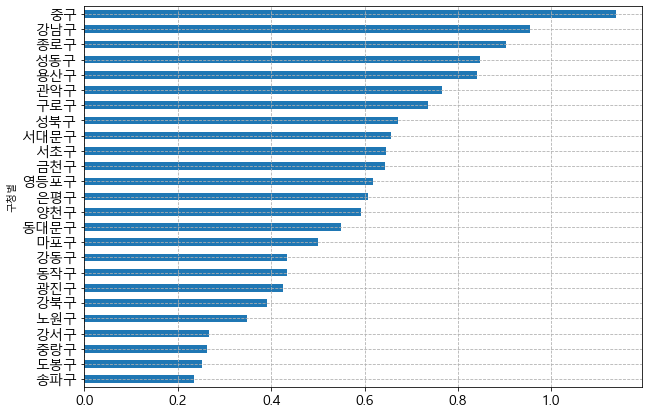

In [27]:
merged['1인당CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 7))
plt.show()

In [28]:
CRIME = pd.read_csv('seoul_crime.csv', sep='\t')
CRIME

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,"101,948","74,487",143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"
5,2018,성동구,"2,457","1,787",2,2,5,8,126,102,999,487,"1,325","1,188"
6,2018,광진구,"3,915","2,789",7,5,2,1,229,184,"1,769",974,"1,908","1,625"
7,2018,동대문구,"3,680","2,968",2,2,5,4,145,112,"1,447",930,"2,081","1,920"
8,2018,중랑구,"4,288","3,222",4,5,3,3,174,145,"1,526",876,"2,581","2,193"
9,2018,성북구,"3,042","2,277",7,6,1,2,183,140,"1,164",635,"1,687","1,494"


In [29]:
CRIME = CRIME.iloc[2:, 1:4]
CRIME.head()

,자치구,합계,합계.1
2,종로구,"3,690","3,913"
3,중구,"4,030","2,679"
4,용산구,"3,411","2,543"
5,성동구,"2,457","1,787"
6,광진구,"3,915","2,789"


In [30]:
CRIME.columns = pd.Index(['구청별', '범죄건', '검거건'])
CRIME.set_index('구청별', inplace=True)
CRIME.head(3)

,범죄건,검거건
구청별,,
종로구,"3,690","3,913"
중구,"4,030","2,679"
용산구,"3,411","2,543"


In [31]:
CRIME = CRIME.apply(lambda x: x.str.replace(',','').apply(pd.to_numeric))
CRIME['검거율'] = CRIME['검거건']/CRIME['범죄건'] * 100
CRIME

,범죄건,검거건,검거율
구청별,,,
종로구,3690,3913,106.043360
중구,4030,2679,66.476427
용산구,3411,2543,74.552917
성동구,2457,1787,72.730973
광진구,3915,2789,71.238825
동대문구,3680,2968,80.652174
중랑구,4288,3222,75.139925
성북구,3042,2277,74.852071
강북구,3437,2743,79.807972


In [32]:
merged1 = pd.concat([merged, CRIME], axis=1)
merged1

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당CCTV비율,범죄건,검거건,검거율
구청별,,,,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0,0.902310,3690,3913,106.043360
중구,135633,125725,9908,22005,1544,317,328,899.0,1.138366,4030,2679,66.476427
용산구,245090,228999,16091,37640,2063,60,73,1930.0,0.841732,3411,2543,74.552917
성동구,316463,308221,8242,42767,2679,933,294,1452.0,0.846544,2457,1787,72.730973
광진구,371063,355559,15504,45619,1581,468,346,767.0,0.426073,3915,2789,71.238825
동대문구,364338,348052,16286,57165,2003,136,197,1670.0,0.549764,3680,2968,80.652174
중랑구,408147,403209,4938,61830,1068,66,9,993.0,0.261670,4288,3222,75.139925
성북구,447687,435868,11819,67782,3003,285,643,2075.0,0.670781,3042,2277,74.852071
강북구,322915,319164,3751,58196,1265,1,319,945.0,0.391744,3437,2743,79.807972


<Figure size 432x288 with 0 Axes>

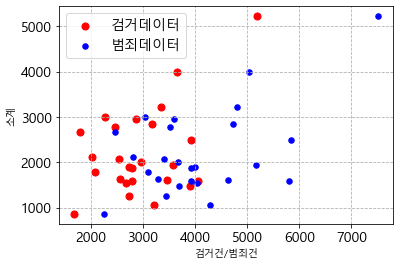

In [33]:
plt.figure()
axsub = merged1.plot.scatter(x='검거건', y='소계', color='red', s=50,
                             label='검거데이터');
merged1.plot.scatter(x='범죄건', y='소계', color='blue', label='범죄데이터', s=30,
                     ax=axsub);
plt.xlabel('검거건/범죄건')
plt.show()

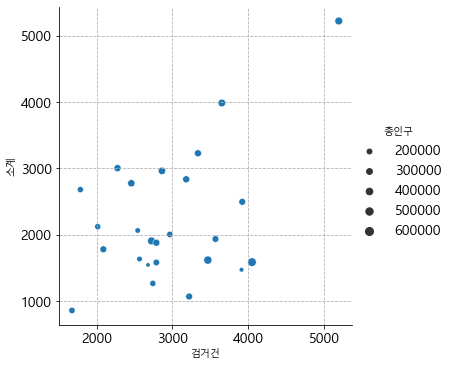

In [34]:
sns.relplot(x='검거건', y='소계', size='총인구', data=merged1)
plt.show()

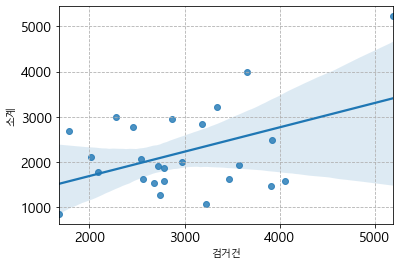

In [35]:
ax = sns.regplot(x='검거건', y='소계', data=merged1)

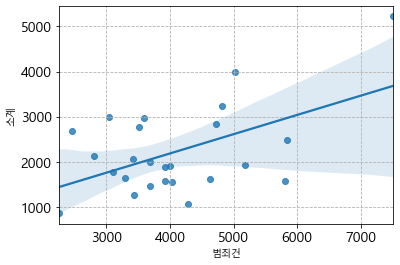

In [36]:
ax1 = sns.regplot(x='범죄건', y='소계', data=merged1)

In [37]:
#pip install pandas-datareader
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
start = datetime(2018, 5, 4)
end = datetime(2021, 1, 5)
ss = web.DataReader('005930.KS', 'yahoo', start, end)
lg = web.DataReader('066570.KS', 'yahoo', start, end)
sk = web.DataReader('000660.KS', 'yahoo', start, end)

In [38]:
ss.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,46826.652344
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,47458.222656


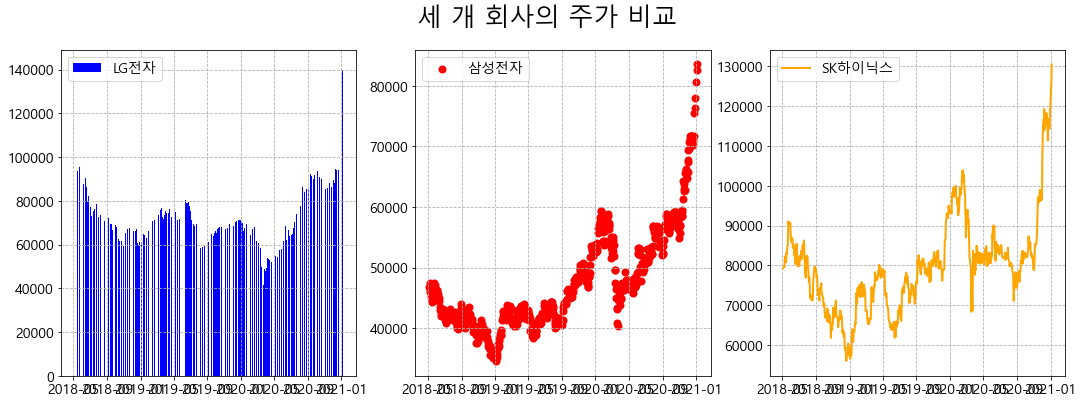

In [39]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.bar(lg.index, lg['Adj Close'], label='LG전자', color='blue', lw=2)
plt.legend()
plt.subplot(132)
plt.scatter(ss.index, ss['Adj Close'], label='삼성전자', color='red', lw=2)
plt.legend()
plt.subplot(133)
plt.plot(sk.index, sk['Adj Close'], label='SK하이닉스', color='orange', lw=2)
plt.legend()
plt.suptitle('세 개 회사의 주가 비교', fontsize=25)
plt.show()

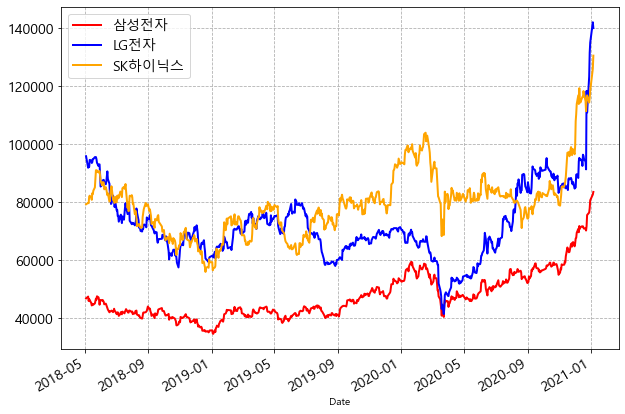

In [40]:
ss['Adj Close'].plot(figsize=(10, 7), label='삼성전자', lw=2, color='red')
lg['Adj Close'].plot(figsize=(10, 7), label='LG전자', lw=2, color='blue')
sk['Adj Close'].plot(figsize=(10, 7), label='SK하이닉스', lw=2, color='orange')
plt.legend()
plt.show()

In [41]:
sk.loc['2019-01-15': '2021-01-05', ['Adj Close']]

,Adj Close
Date,
2019-01-15,62683.421875
2019-01-16,63466.964844
2019-01-17,63564.906250
2019-01-18,63271.078125
2019-01-21,65621.703125
...,...
2020-12-28,114330.000000
2020-12-29,116000.000000
2020-12-30,118500.000000


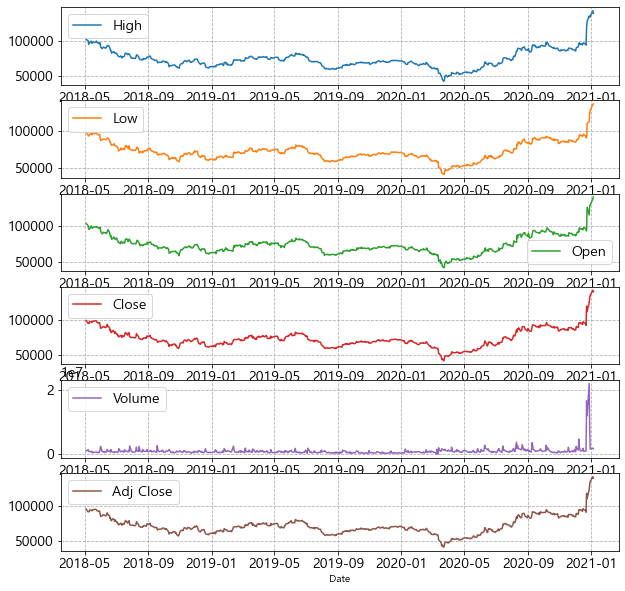

In [42]:
lg.plot(subplots=True, layout=(6, 1), figsize=(10, 10), sharex=False)
plt.show()

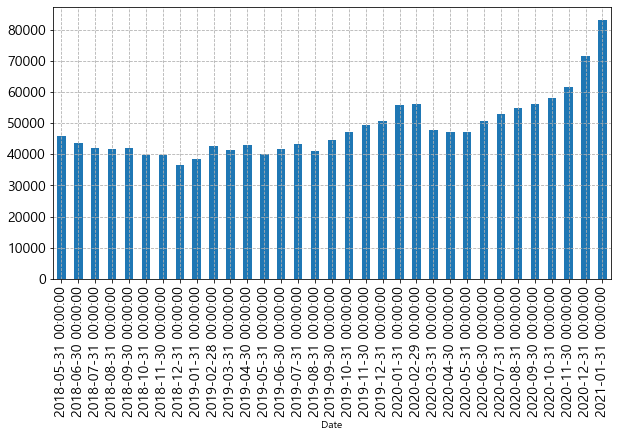

In [43]:
ss['Adj Close'].resample('M').mean().plot(kind='bar', figsize=(10, 5))
plt.show()

In [44]:
ss_adj = pd.DataFrame(ss['Adj Close'])
ss_adj['change'] = np.log(ss_adj['Adj Close']/ss_adj['Adj Close'].shift())

C:\Users\HONG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HONG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


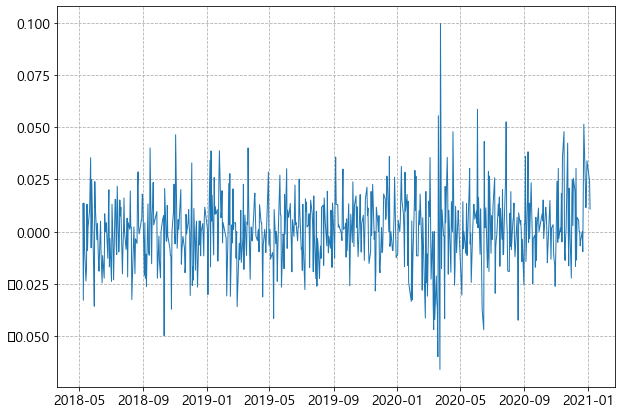

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(ss_adj.change, lw=1)
plt.show()


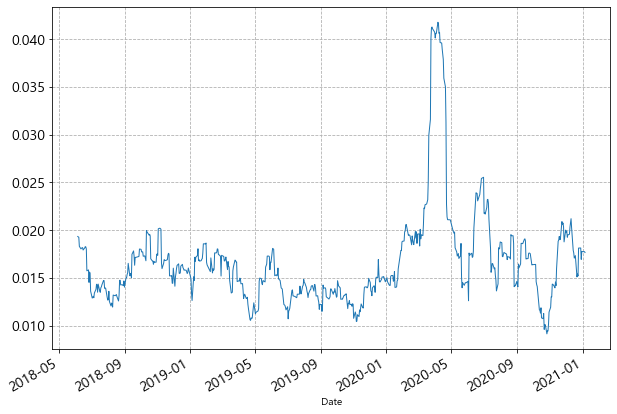

In [46]:
ss_adj['volatility'] = ss_adj.change.rolling(20).std()
ss_adj['volatility'].plot(figsize=(10, 7), lw=1)
plt.show()

In [47]:
ra5 = ss['Adj Close'].rolling(window=5).mean()
ra20 = ss['Adj Close'].rolling(window=20).mean()
ra60 = ss['Adj Close'].rolling(window=60).mean()
ra120 = ss['Adj Close'].rolling(window=120).mean()
ra240 = ss['Adj Close'].rolling(window=240).mean()

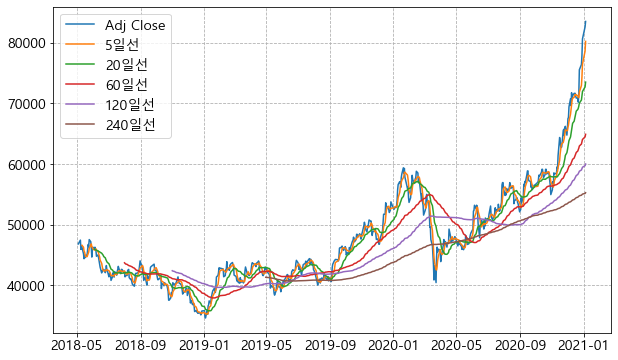

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(ss.index, ss['Adj Close'], label='Adj Close', lw=1.5)
plt.plot(ss.index, ra5, label='5일선', lw=1.5)
plt.plot(ss.index, ra20, label='20일선', lw=1.5)
plt.plot(ss.index, ra60, label='60일선', lw=1.5)
plt.plot(ss.index, ra120, label='120일선', lw=1.5)
plt.plot(ss.index, ra240, label='240일선', lw=1.5)
plt.legend(loc='best')
plt.show()

In [49]:
ss1 = web.DataReader('005930.KS', 'yahoo', start, end)
lg1 = web.DataReader('066570.KS', 'yahoo', start, end)
sk1 = web.DataReader('000660.KS', 'yahoo', start, end)
ss1 = ss1['Adj Close']
lg1 = lg1['Adj Close']
sk1 = sk1['Adj Close']
comp = pd.concat([ss1, lg1, sk1], axis=1)
comp.columns = pd.Index(['삼성전자', 'LG전자', 'SK하이닉스'])
comp

,삼성전자,LG전자,SK하이닉스
Date,,,
2018-05-04,46826.652344,95827.476562,79263.632812
2018-05-08,47458.222656,91858.875000,79741.117188
2018-05-09,45924.394531,92246.054688,79645.625000
2018-05-10,46555.972656,92149.257812,81937.585938
2018-05-11,46285.292969,94569.148438,82224.078125
...,...,...,...
2020-12-28,76428.375000,123300.000000,114330.000000
2020-12-29,77953.601562,131500.000000,116000.000000
2020-12-30,80641.656250,135000.000000,118500.000000


In [50]:
pctcomp = comp.pct_change()
corr = pctcomp.corr()
corr

,삼성전자,LG전자,SK하이닉스
삼성전자,1.000000,0.352158,0.715218
LG전자,0.352158,1.000000,0.292146
SK하이닉스,0.715218,0.292146,1.000000


C:\Users\HONG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HONG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


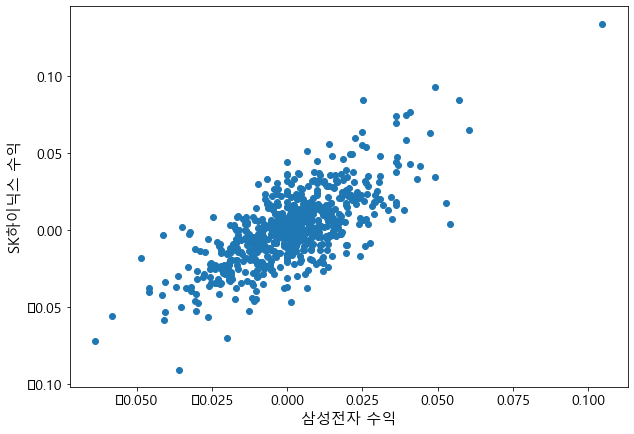

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(pctcomp.삼성전자, pctcomp.SK하이닉스)
plt.xlabel('삼성전자 수익', fontsize=15)
plt.ylabel('SK하이닉스 수익', fontsize=15)
plt.grid()
plt.show()

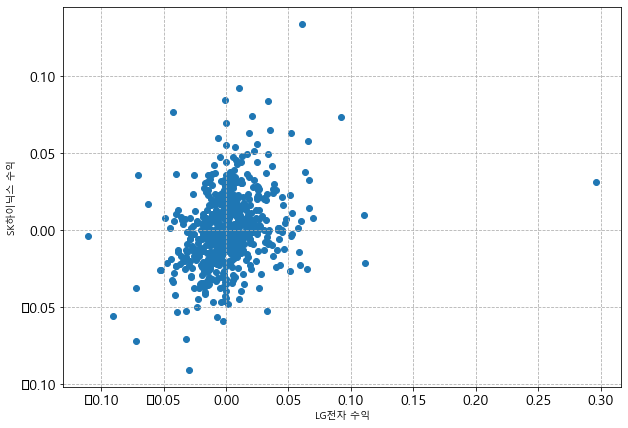

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(pctcomp.LG전자, pctcomp.SK하이닉스)
plt.xlabel('LG전자 수익')
plt.ylabel('SK하이닉스 수익')
plt.show()

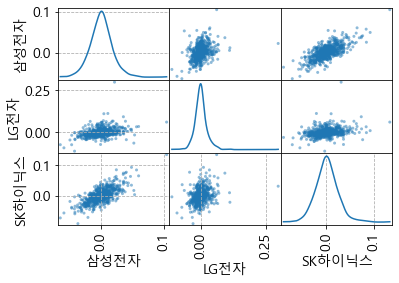

In [53]:
scat = pd.plotting.scatter_matrix(pctcomp, diagonal='kde')
for ax in scat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(labelsize=14)
plt.show()

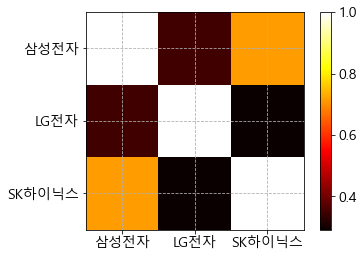

In [54]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

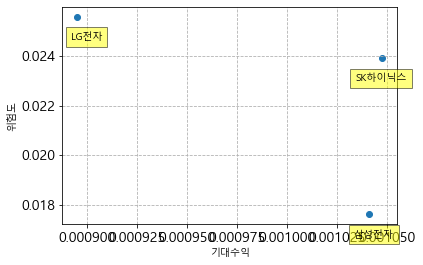

In [55]:
plt.scatter(pctcomp.mean(), pctcomp.std())
plt.xlabel('기대수익')
plt.ylabel('위험도')
for label, x, y in zip(pctcomp.columns, pctcomp.mean(), pctcomp.std()):
    plt.annotate(
        label,
    xy=(x,y), xytext=(25,-25),
    textcoords='offset points',
    horizontalalignment='right',
    verticalalignment='bottom',
    bbox=dict(boxstyle='square', pad=0.5, fc='yellow', alpha=0.5))
plt.show()

In [56]:
train_date = '2019-12-31'
ss['Date'] = ss.index
ss['Date'] = pd.to_datetime(ss['Date'])
mask1 = (ss['Date'] <= train_date)
train_st = ss[mask1]
mask2 = (ss['Date'] > train_date)
test_st = ss[mask2]
train_st

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,46826.652344,2018-05-04
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,47458.222656,2018-05-08
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,45924.394531,2018-05-09
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,46555.972656,2018-05-10
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,46285.292969,2018-05-11
...,...,...,...,...,...,...,...
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,52485.175781,2019-12-23
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,52012.339844,2019-12-24
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,52390.609375,2019-12-26


In [57]:
test_st

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52537.179688,2020-01-02
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,52822.707031,2020-01-03
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,52822.707031,2020-01-06
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,53108.238281,2020-01-07
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,54059.992188,2020-01-08
...,...,...,...,...,...,...,...
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000,2020-12-28
2020-12-29,78900.0,77300.0,78800.0,78300.0,30339449.0,77953.601562,2020-12-29
2020-12-30,81300.0,77300.0,77400.0,81000.0,29417421.0,80641.656250,2020-12-30


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


In [59]:
df = pd.read_csv('soccer.csv')
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [60]:
df.isnull().values.any()

False

In [61]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [62]:
df.date = pd.to_datetime(df.date)
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [63]:
df.sort_values(by='date', ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [64]:
df['score_sum'] = df.home_score + df.away_score
df['score_diff'] = abs(df.home_score - df.away_score)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3
...,...,...,...,...,...,...,...,...,...,...,...
41535,2019-11-19,Kyrgyzstan,Tajikistan,1,1,FIFA World Cup qualification,Bishkek,Kyrgyzstan,False,2,0
41536,2019-11-19,Vietnam,Thailand,0,0,FIFA World Cup qualification,Hanoi,Vietnam,False,0,0
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,2,2
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False,2,2


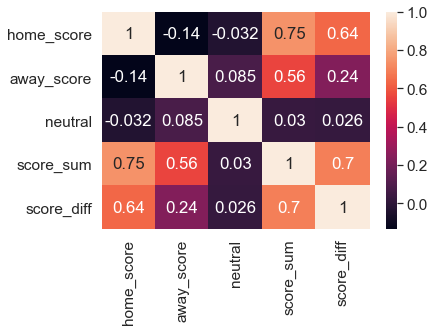

In [65]:
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [66]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'score_sum', 'score_diff'],
      dtype='object')

In [67]:
df.index

RangeIndex(start=0, stop=41540, step=1)

In [68]:
df[['home_score']].describe()

,home_score
count,41540.000000
mean,1.745643
std,1.753444
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


In [69]:
def formal_score(df):
    max_s = max(df.home_score, df.away_score)
    min_s = min(df.home_score, df.away_score)
    return '{}-{}'.format(max_s, min_s)

In [70]:
df['formal_score'] = df.apply(formal_score, axis=1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3,3-0
...,...,...,...,...,...,...,...,...,...,...,...,...
41535,2019-11-19,Kyrgyzstan,Tajikistan,1,1,FIFA World Cup qualification,Bishkek,Kyrgyzstan,False,2,0,1-1
41536,2019-11-19,Vietnam,Thailand,0,0,FIFA World Cup qualification,Hanoi,Vietnam,False,0,0,0-0
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,False,2,2,2-0
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,False,2,2,2-0


In [71]:
df.groupby('away_team')['home_score'].count()

away_team
Abkhazia          10
Afghanistan       71
Albania          157
Alderney          12
Algeria          213
                ... 
Yugoslavia       290
Zambia           418
Zanzibar         147
Zimbabwe         266
Åland Islands     19
Name: home_score, Length: 306, dtype: int64

In [72]:
away_ind = pd.DataFrame(df.groupby('away_team')['home_score'].count().index)

In [73]:
away_val = pd.DataFrame( df.groupby('away_team')['home_score'].count().values,
columns=['Value'])
home_total = pd.concat([away_ind, away_val], axis=1)
home_total.head(2)

,away_team,Value
0,Abkhazia,10
1,Afghanistan,71


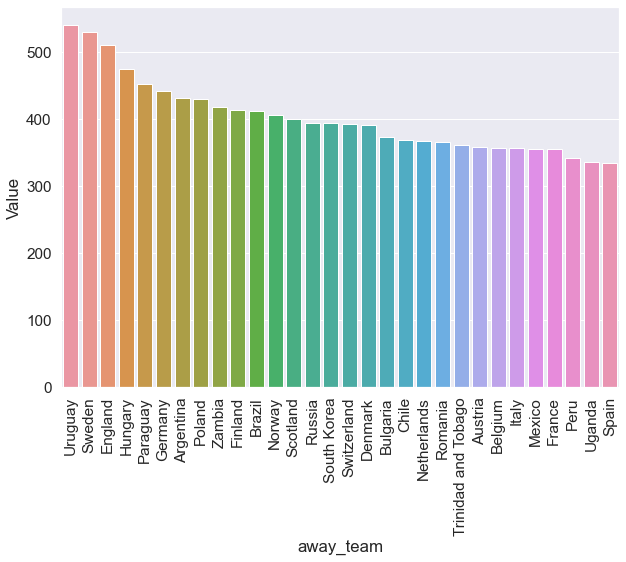

In [74]:
plt.figure(figsize=(10, 7))
home_total = home_total.sort_values(by='Value', ascending=False)
sns.barplot(x=home_total.away_team[:30], y=home_total.Value[:30])
plt.xticks(rotation=90)
plt.show()

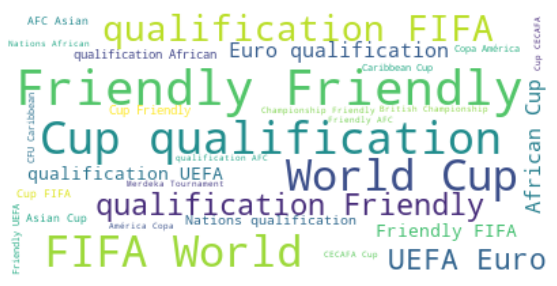

In [75]:
text = " ".join(cups for cups in df.tournament)
wc = WordCloud(max_words=30, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

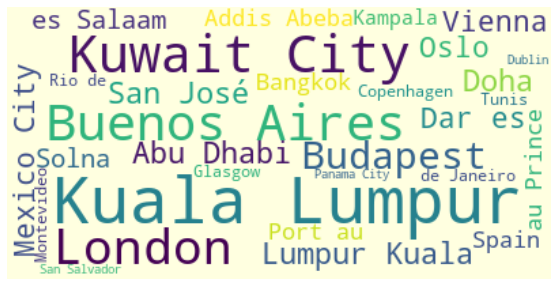

In [76]:
text1 = " ".join(each for each in df.city)
wc1 = WordCloud(max_words=30, background_color='lightyellow').generate(text1)
plt.figure(figsize=(10, 5))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
df.tournament.value_counts()

Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

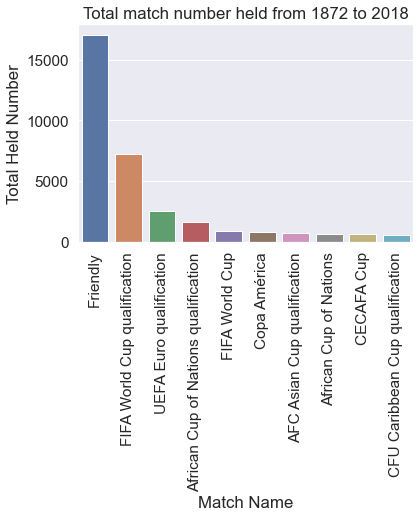

In [78]:
sns.barplot(x=df['tournament'].value_counts().index[:10],
y=df.tournament.value_counts().values[:10])
plt.xticks(rotation=90)
plt.ylabel('Total Held Number')
plt.xlabel('Match Name')
plt.title('Total match number held from 1872 to 2018')
plt.show()

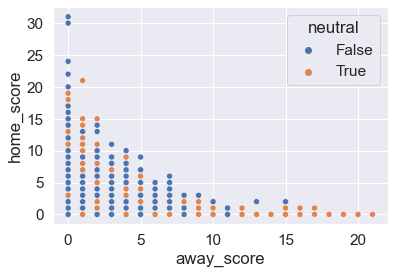

In [79]:
sns.scatterplot(x='away_score', y='home_score', hue='neutral', data=df)
plt.show()

In [80]:
home_team_count = df['home_team'].value_counts()
home_team_count = home_team_count.head(10)
home_team_count

Brazil         568
Argentina      548
Mexico         513
Germany        506
England        498
Sweden         486
France         484
South Korea    465
Hungary        453
Italy          443
Name: home_team, dtype: int64

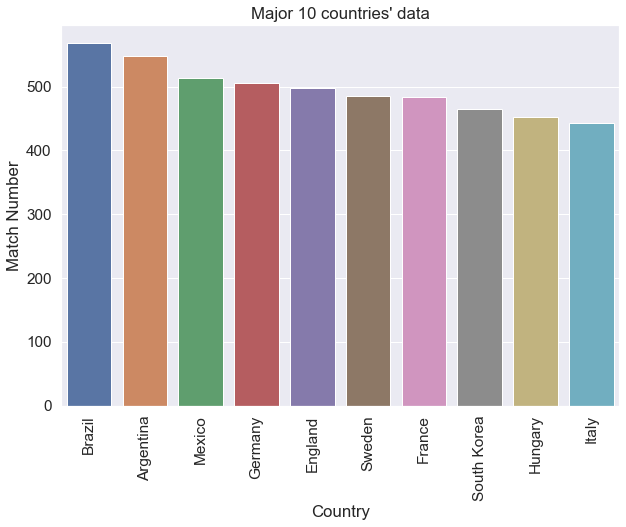

In [81]:
plt.figure(figsize=(10, 7))
sns.barplot(x=home_team_count.index, y=home_team_count.values)
plt.xlabel('Country')
plt.ylabel('Match Number')
plt.xticks(rotation=90)
plt.title("Major 10 countries' data")
plt.show()
          

In [82]:
Korea = df[df.home_team == 'South Korea']
Korea

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
3082,1950-04-16,South Korea,Chinese Taipei,3,1,Friendly,Wan Chai,Hong Kong,True,4,2,3-1
3457,1953-04-08,South Korea,Chinese Taipei,2,4,Friendly,So Kon Po,Hong Kong,True,6,2,4-2
3656,1954-06-20,South Korea,Turkey,0,7,FIFA World Cup,Geneva,Switzerland,True,7,7,7-0
3935,1956-04-21,South Korea,Philippines,3,0,AFC Asian Cup qualification,Seoul,South Korea,False,3,3,3-0
3998,1956-08-26,South Korea,Chinese Taipei,2,0,AFC Asian Cup qualification,Seoul,South Korea,False,2,2,2-0
...,...,...,...,...,...,...,...,...,...,...,...,...
40577,2019-03-26,South Korea,Colombia,2,1,Friendly,Seoul,South Korea,False,3,1,2-1
40685,2019-06-07,South Korea,Australia,1,0,Friendly,Busan,South Korea,False,1,1,1-0
40753,2019-06-11,South Korea,Iran,1,1,Friendly,Seoul,South Korea,False,2,0,1-1
40989,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True,4,0,2-2


In [83]:
all_away_team = Korea['away_team'].unique()
all_away_team

array(['Chinese Taipei', 'Turkey', 'Philippines', 'Vietnam Republic',
       'United States', 'Singapore', 'Indonesia', 'Hong Kong', 'Israel',
       'Japan', 'Yugoslavia', 'Thailand', 'Malaysia', 'Western Australia',
       'Australia', 'Laos', 'Cambodia', 'Burma', 'Iran', 'Iraq', 'Kuwait',
       'Lebanon', 'India', 'New Zealand', 'Libya', 'Syria', 'Bahrain',
       'Macau', 'China PR', 'Sudan', 'Sri Lanka', 'Bangladesh',
       'Luxembourg', 'United Arab Emirates', 'North Korea', 'Uruguay',
       'Nigeria', 'Ghana', 'Nepal', 'Guatemala', 'Cameroon', 'Yemen',
       'Pakistan', 'Qatar', 'Paraguay', 'Bulgaria', 'Italy', 'Egypt',
       'Zambia', 'Yemen DPR', 'Saudi Arabia', 'Czechoslovakia', 'Norway',
       'Spain', 'Malta', 'Romania', 'Czech Republic', 'Bolivia',
       'Ukraine', 'Colombia', 'Serbia', 'Costa Rica', 'Brazil', 'Morocco',
       'Sweden', 'Guam', 'Tajikistan', 'Kazakhstan', 'Uzbekistan',
       'Jamaica', 'Mexico', 'Belgium', 'Croatia', 'Mongolia',
       'North Mace

In [84]:
Away_team = []
Korea_team = []
for team in all_away_team:
    Away_team.append(np.sum(Korea[Korea['away_team'] == team].away_score))
    Korea_team.append(np.sum(Korea[Korea['away_team'] == team].home_score))

In [85]:
Away_team

[8,
 12,
 0,
 11,
 1,
 7,
 4,
 5,
 1,
 15,
 3,
 18,
 21,
 3,
 13,
 0,
 2,
 2,
 17,
 4,
 3,
 0,
 1,
 1,
 0,
 1,
 4,
 1,
 10,
 0,
 0,
 0,
 3,
 3,
 3,
 9,
 4,
 4,
 0,
 0,
 3,
 0,
 0,
 5,
 4,
 2,
 4,
 7,
 4,
 1,
 6,
 0,
 6,
 3,
 1,
 4,
 4,
 0,
 0,
 3,
 5,
 5,
 8,
 5,
 4,
 0,
 1,
 0,
 7,
 1,
 7,
 3,
 4,
 0,
 1,
 8,
 4,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 0,
 2,
 2]

In [86]:
frames = [all_away_team, Korea_team, Away_team]
all_country = pd.DataFrame(frames)
all_country

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,Chinese Taipei,Turkey,Philippines,Vietnam Republic,United States,Singapore,Indonesia,Hong Kong,Israel,Japan,...,Peru,Haiti,Mali,Switzerland,Tunisia,Algeria,Venezuela,Canada,Panama,Georgia
1,25,4,11,22,4,58,37,24,7,33,...,0,4,3,2,0,2,3,2,2,2
2,8,12,0,11,1,7,4,5,1,15,...,0,1,1,1,1,4,1,0,2,2


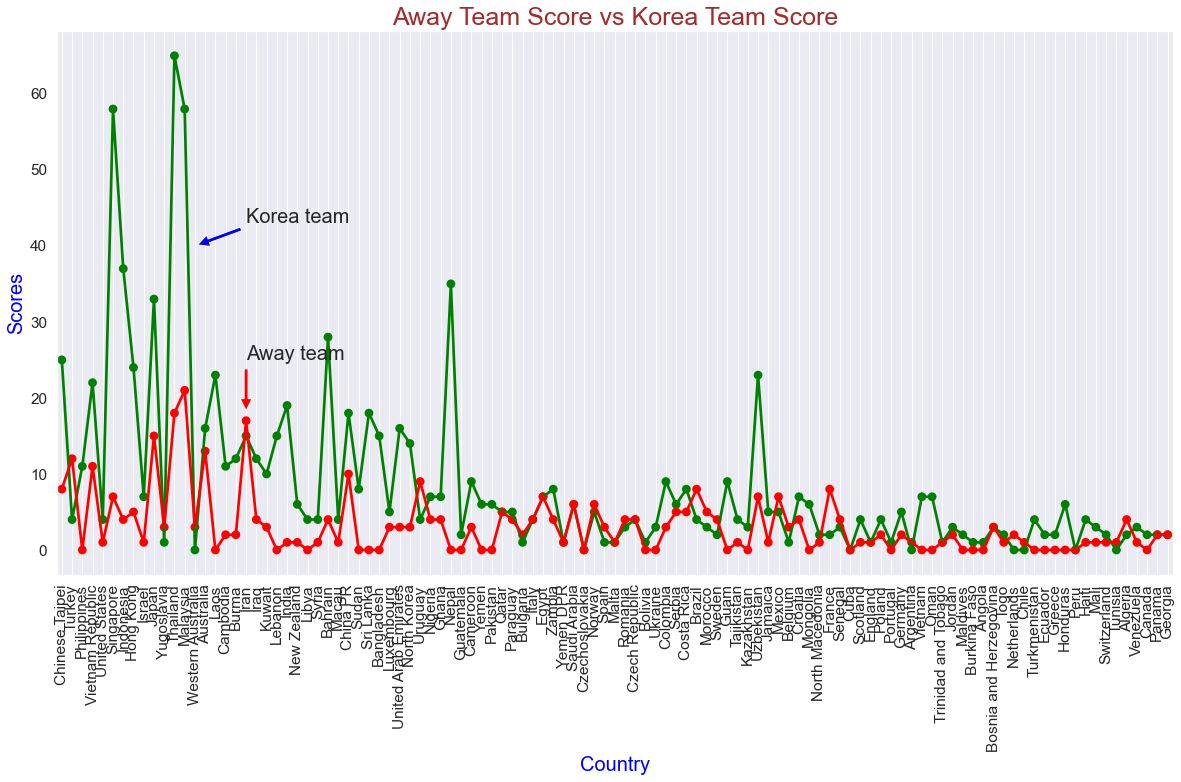

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x=all_away_team, y=Korea_team, color='green', alpha=0.5)
sns.pointplot(x=all_away_team, y=Away_team, color='red', alpha=0.5)
ax.annotate('Korea team', xy=(13, 40), xytext=(18, 43), fontsize=20,
            arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('Away team', xy=(18, 18), xytext=(18 ,25), fontsize=20,
arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Country', fontsize=20, color='blue')
plt.xticks(rotation=90)
plt.ylabel('Scores', fontsize=20, color='blue')
plt.title('Away Team Score vs Korea Team Score', fontsize=25, color='brown')
plt.grid()
plt.show()

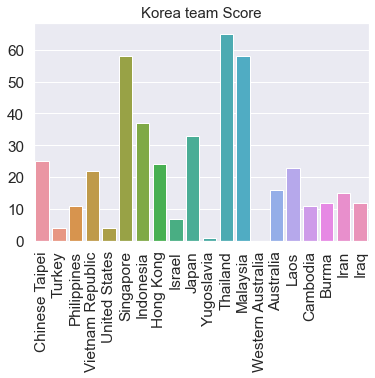

In [88]:
sns.barplot(x=all_away_team[:20], y=Korea_team[:20])
plt.title('Korea team Score', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [89]:
def avg_goal_per_year(year):
    match = (df.home_team == 'South Korea') & df.date.astype(str).str.contains(year)
    return df[match].score_sum.mean()

match_yrs = [str(2009+i) for i in range(0, 10)]
avg_goal_for_yrs = [avg_goal_per_year(year) for year in match_yrs]

In [90]:
yrs = pd.DataFrame(match_yrs, columns=['year'])
goal = pd.DataFrame(avg_goal_for_yrs, columns=['average score'])
avg_goal = pd.concat([yrs, goal], axis=1)

avg_goal

,year,average score
0,2009,1.750000
1,2010,2.166667
2,2011,3.875000
3,2012,3.400000
4,2013,2.083333
5,2014,2.714286
6,2015,2.545455
7,2016,3.200000
8,2017,2.333333
9,2018,2.166667


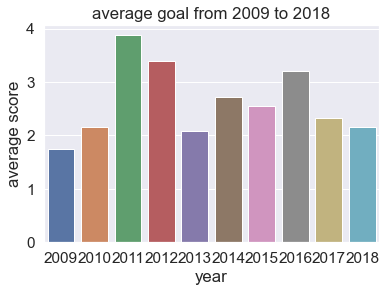

In [91]:
sns.barplot(x=avg_goal['year'], y=avg_goal['average score'])
plt.title('average goal from 2009 to 2018')
plt.show()

In [92]:
k_match = (df.home_team) == 'South Korea'
def k_year(year):
    return df.date.astype(str).str.contains(str(year))
k_yearly = k_match & (k_year(2013) | k_year(2014) | k_year(2015) | k_year(2016) |
k_year(2017) | k_year(2018))
df[k_yearly].head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
35058,2013-03-26,South Korea,Qatar,2,1,FIFA World Cup qualification,Seoul,South Korea,False,3,1,2-1
35200,2013-06-11,South Korea,Uzbekistan,1,0,FIFA World Cup qualification,Seoul,South Korea,False,1,1,1-0


In [93]:
df[k_yearly].formal_score.value_counts()

2-0    10
1-0     9
2-1     8
0-0     8
3-1     5
4-0     2
3-2     2
1-1     2
2-2     2
3-0     2
4-1     1
8-0     1
4-2     1
Name: formal_score, dtype: int64

In [94]:
score_dist = df[k_yearly].formal_score.value_counts(normalize=True)
score_dist

2-0    0.188679
1-0    0.169811
2-1    0.150943
0-0    0.150943
3-1    0.094340
4-0    0.037736
3-2    0.037736
1-1    0.037736
2-2    0.037736
3-0    0.037736
4-1    0.018868
8-0    0.018868
4-2    0.018868
Name: formal_score, dtype: float64

In [95]:
x = score_dist.index
x

Index(['2-0', '1-0', '2-1', '0-0', '3-1', '4-0', '3-2', '1-1', '2-2', '3-0',
       '4-1', '8-0', '4-2'],
      dtype='object')

In [96]:
y = score_dist.values
y

array([0.18867925, 0.16981132, 0.1509434 , 0.1509434 , 0.09433962,
       0.03773585, 0.03773585, 0.03773585, 0.03773585, 0.03773585,
       0.01886792, 0.01886792, 0.01886792])

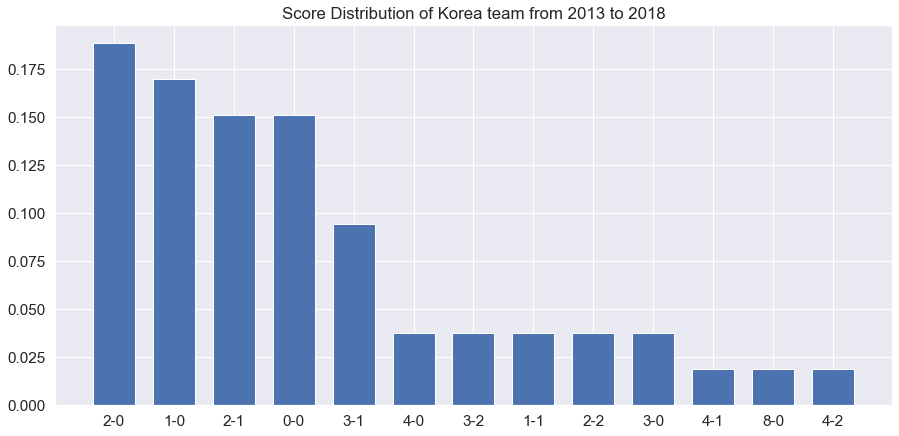

In [97]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x, y, width=0.7)
plt.title('Score Distribution of Korea team from 2013 to 2018')#, fontszie=25)
plt.show()